## Importing Libraries

In [5]:
#In this section, necessary libraries are imported, including Pandas for data manipulation, NumPy for numerical operations,
#Seaborn and Matplotlib for visualization, Plotly for interactive plots, and IPython for display-related functionalities.

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##Reading the Data

In [6]:
#Reads a CSV file into a Pandas DataFrame named df and displays the first few rows of the DataFrame using the head() method.
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##Data Exploration

In [7]:
#Here we will know the information about the DataFrame, such as column data types, unique values, summary statistics, number
#of unique genres, unique years, unique ratings, unique durations, genre-wise counts, top directors, and checking for null values.
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   9

##Data Cleaning

In [8]:
#This section includes data cleaning steps like changing the datatype of the 'Duration' column, replacing values in the 'Votes' column,
#handling null values in 'Year' and 'Genre' columns, and replacing null values in 'Rating', 'Duration', and 'Votes' with appropriate values.
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)
df["Votes"] = df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',', ''))

# Dropping null values
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

# Replacing Null Values ....
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

#Checking Null Values again for confirmation.
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

##Data Visualization

In [10]:
#Defining Functions for data visualization

#Here, functions like Talents (bar plots for top 10 directors and actors) and Histo (histograms for 'Year', 'Duration', 'Votes', 'Rating')
#are defined and called to visualize data.

def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [11]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [12]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

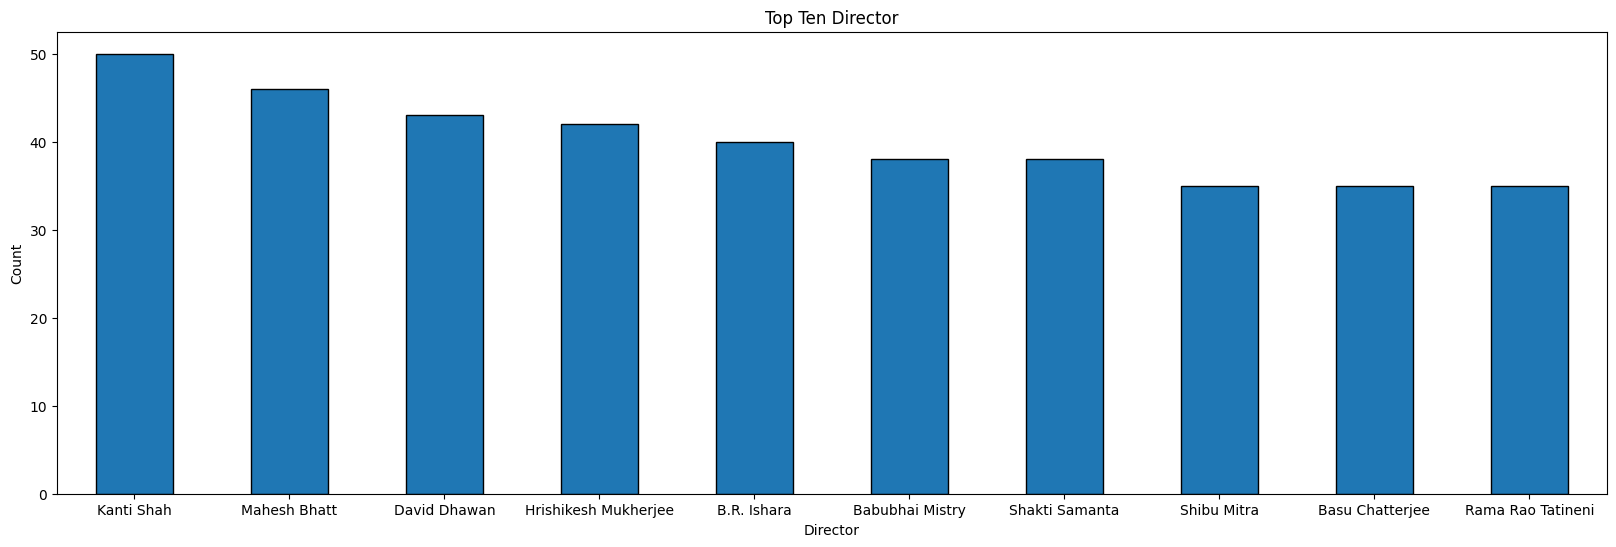

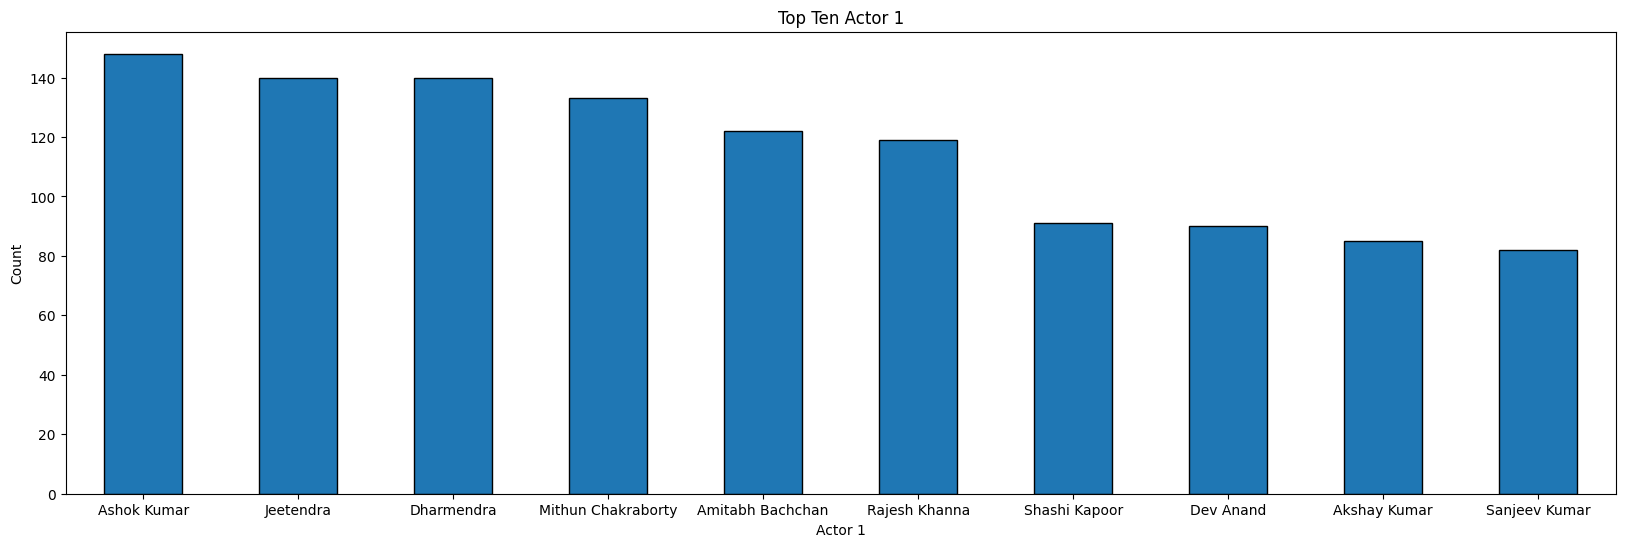

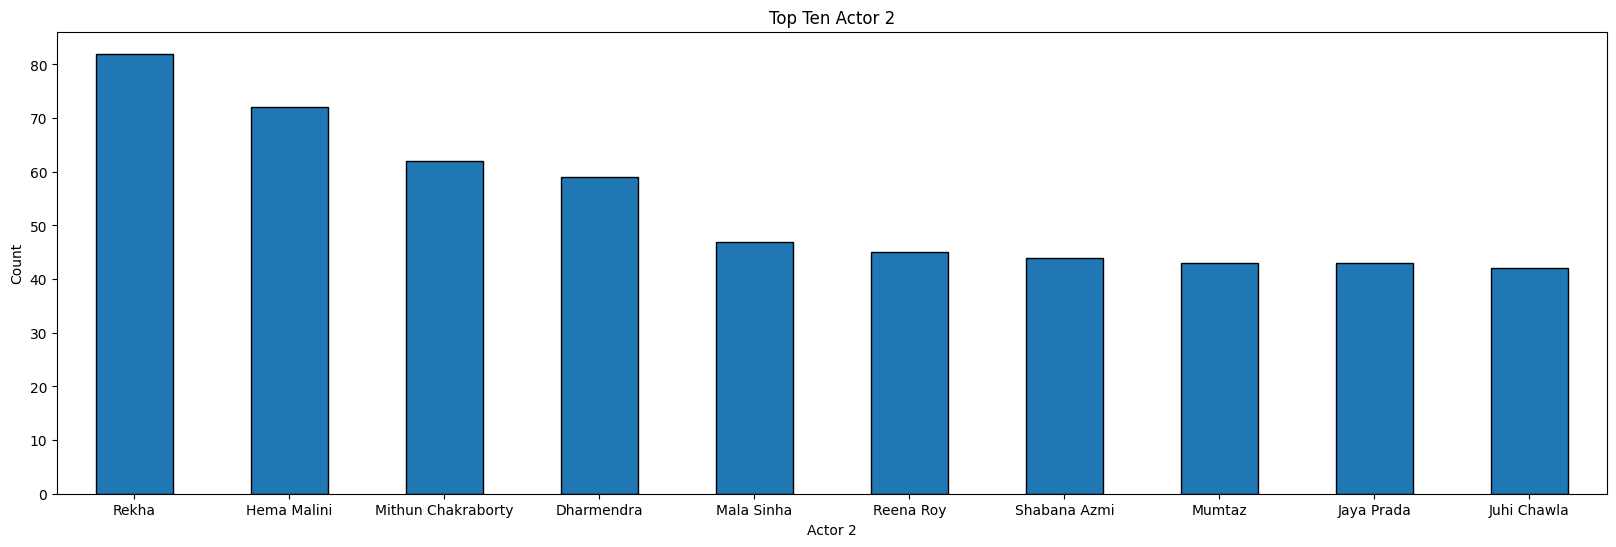

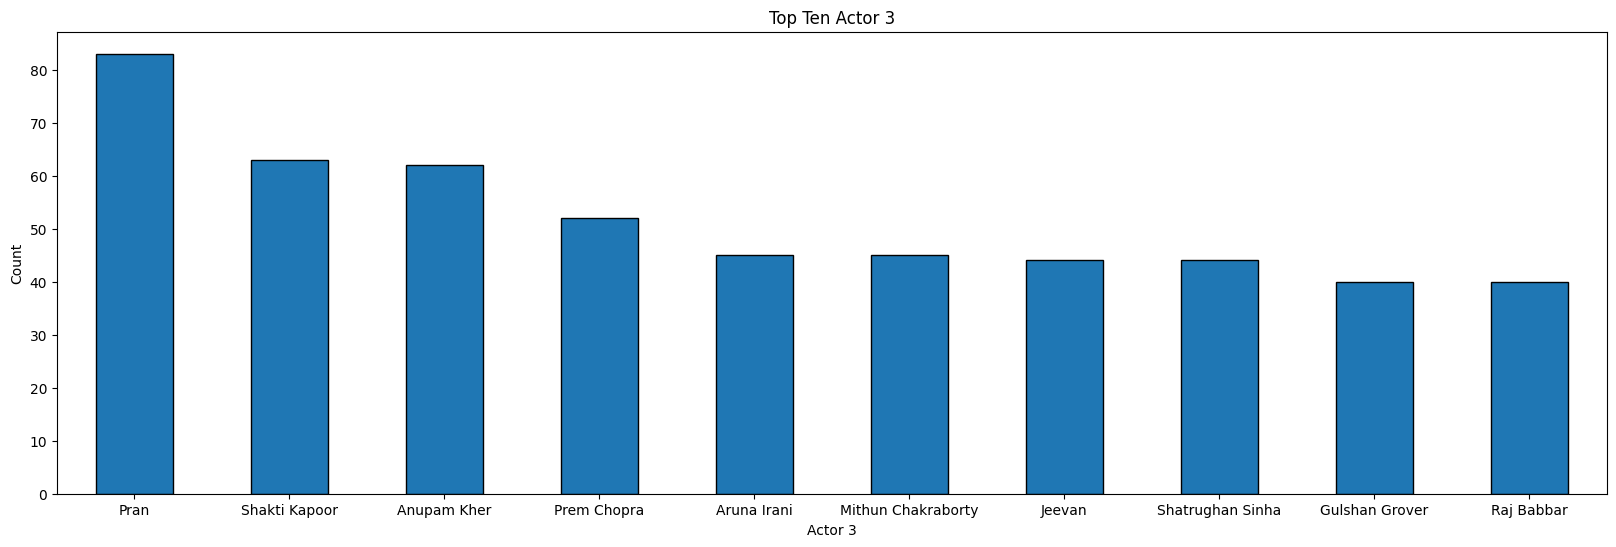

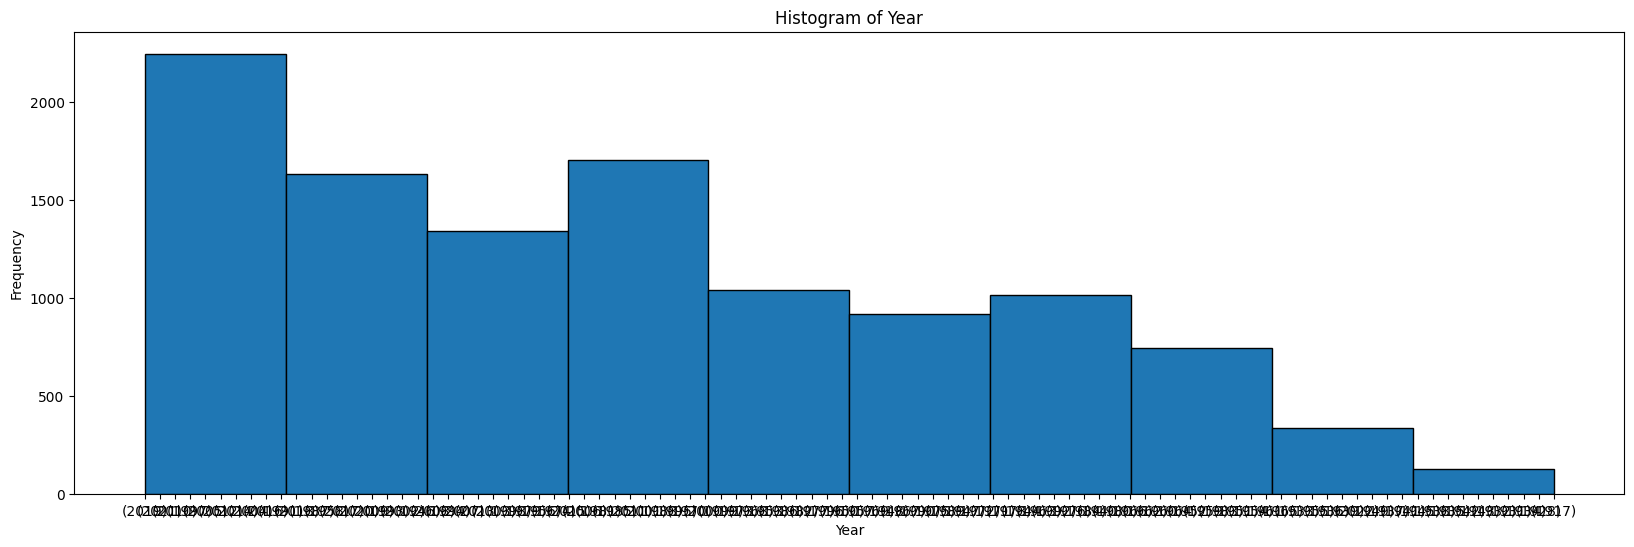

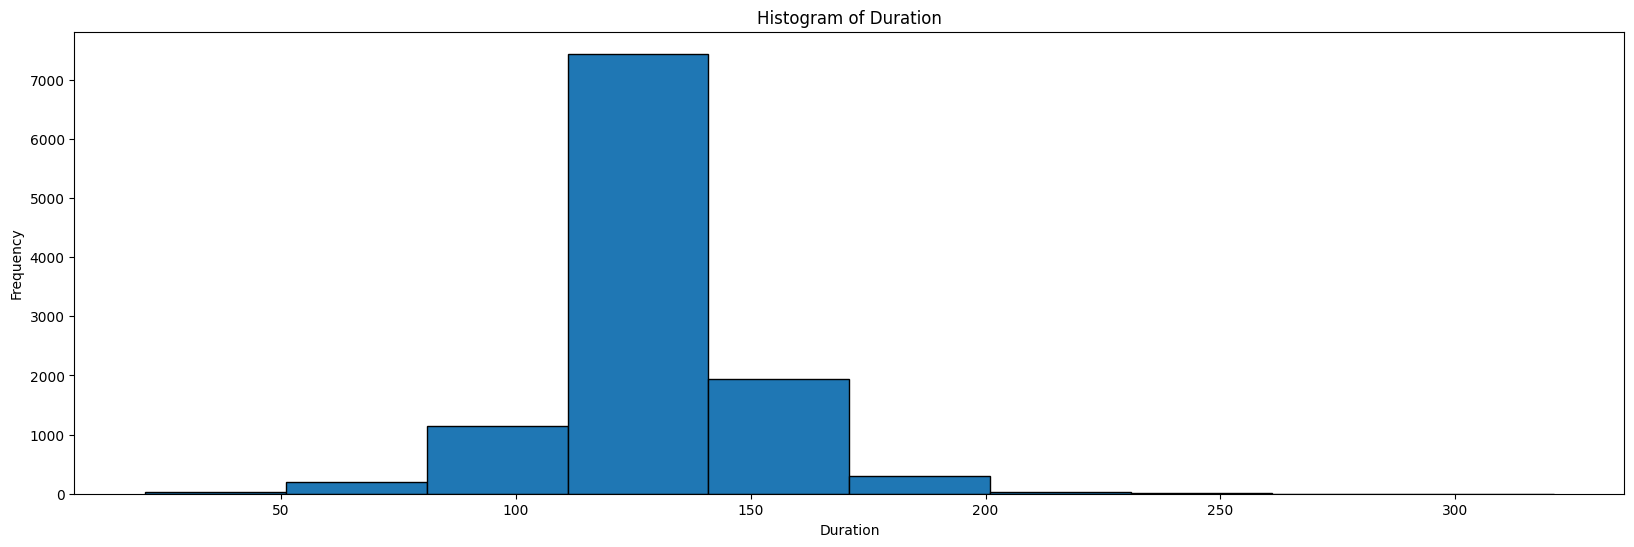

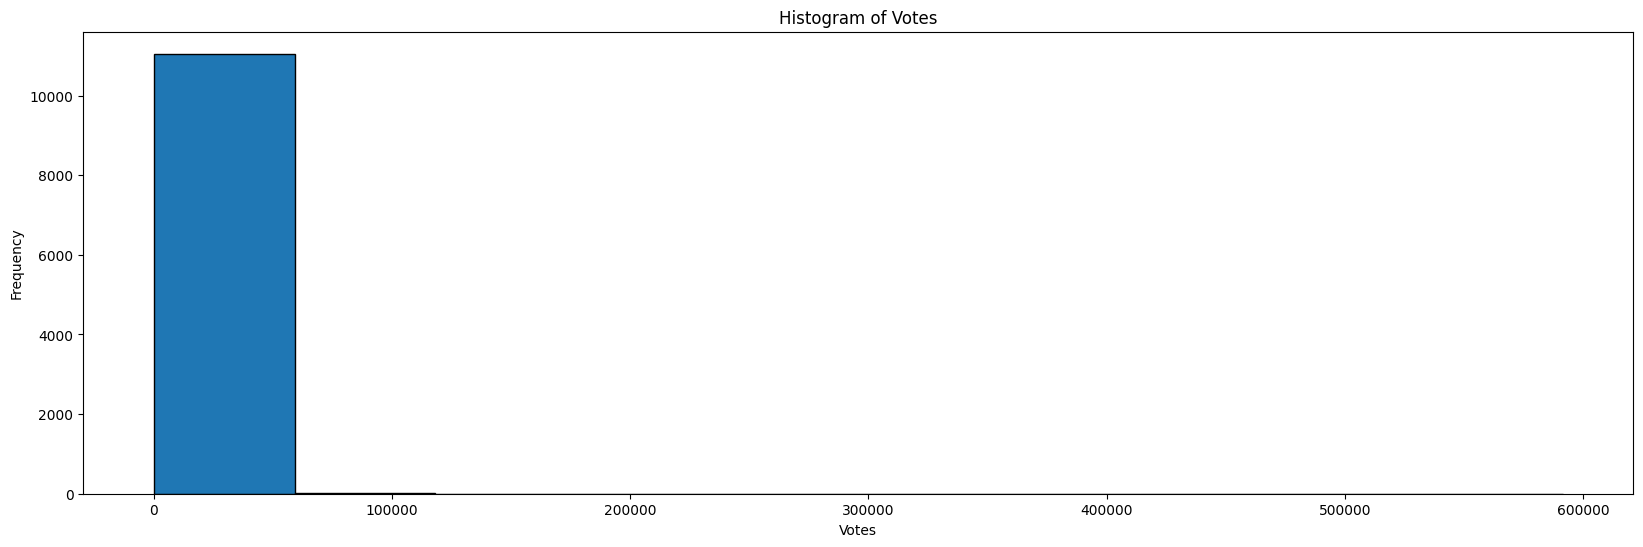

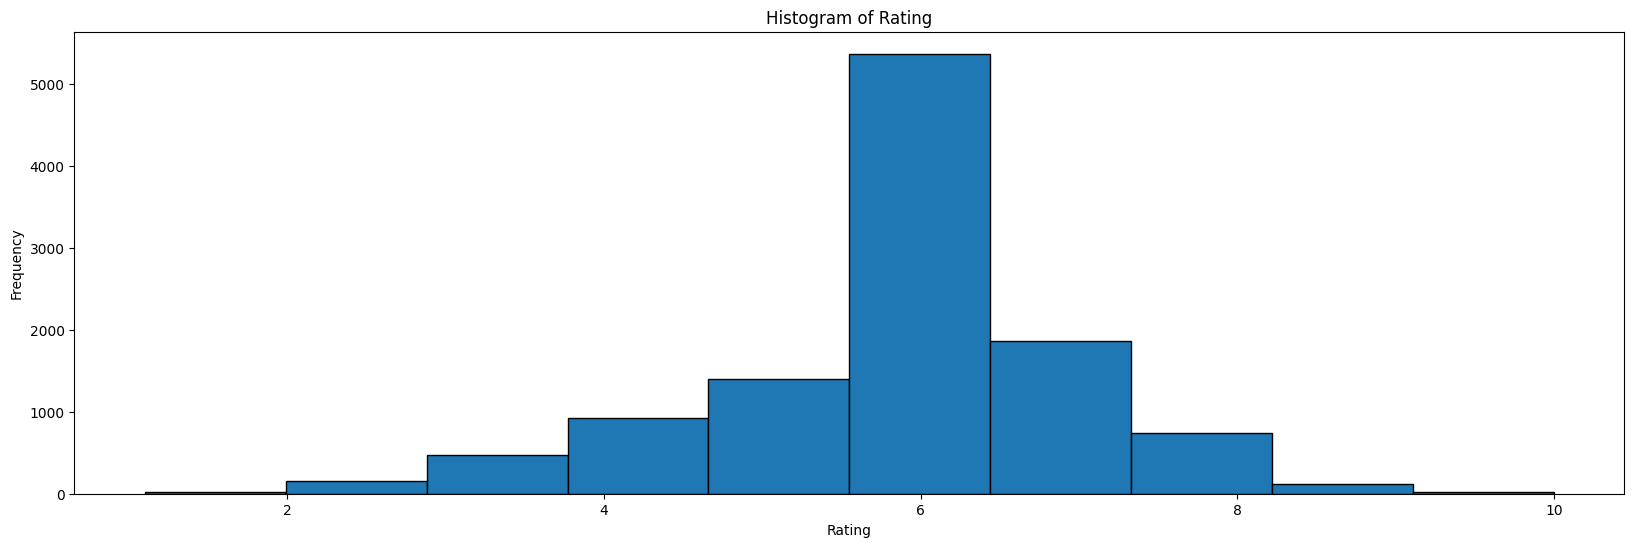

In [13]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

##Pair Plots and Correlation Matrix

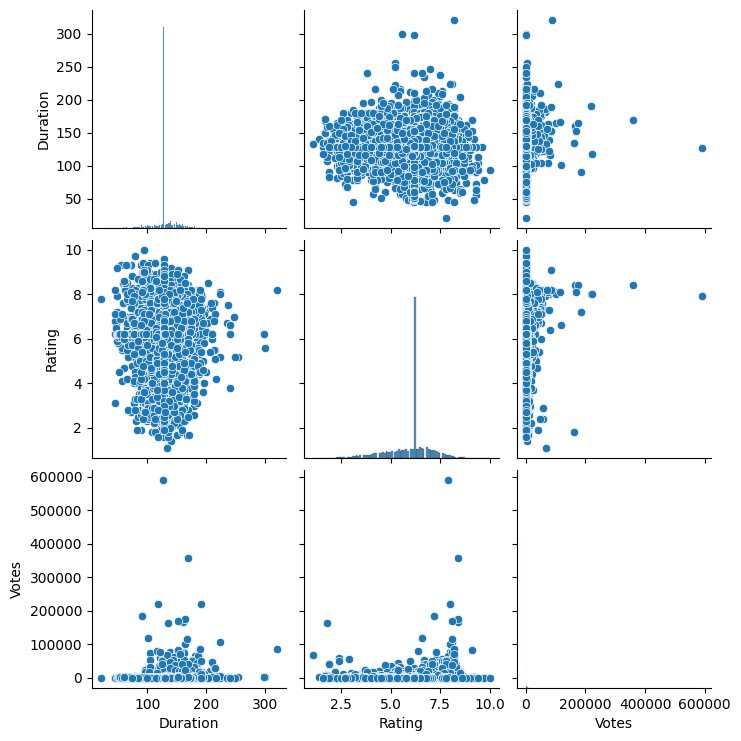

In [14]:
#Pair plot for numeric columns and calculates the correlation matrix using the Spearman method.

import seaborn as sns

sns.pairplot(df)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')

##Model Deployment

In [15]:
#Deploying machine learning models (Linear Regression and Random Forest Regressor) to predict movie ratings based on features like
#year, duration, votes, encoded actors, director, and genre.
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [17]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

,0
Name,0.0
Year,0.0
Duration,0.0
Genre,0.0
Rating,0.0
Votes,0.0
Director,0.0
Actor 1,0.0
Actor 2,0.0
Actor 3,0.0


In [18]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [19]:
# Assuming 'df' is your DataFrame

# Extracting the numeric part from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

# Encoding categorical variables based on mean ratings
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

# Drop original categorical columns
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

# Define features and target variable
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model Building - Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

##Model Evaluation

In [20]:
#Here, the models' performance is evaluated using metrics such as Mean Squared Error, Mean Absolute Error, and R-squared.

# Evaluate Linear Regression
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Linear Regression Metrics:
Mean Squared Error: 0.36662604478335076
Mean Absolute Error: 0.42998250063456533
R2 Score: 0.7225086563365912

Random Forest Regressor Metrics:
Mean Squared Error: 0.26713951262398555
Mean Absolute Error: 0.30341073038774197
R2 Score: 0.7978078661939506


##Visualization of Model Predictions

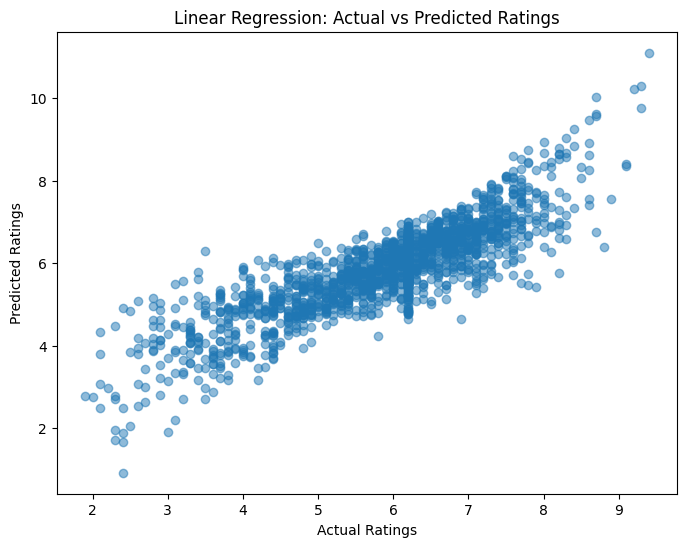

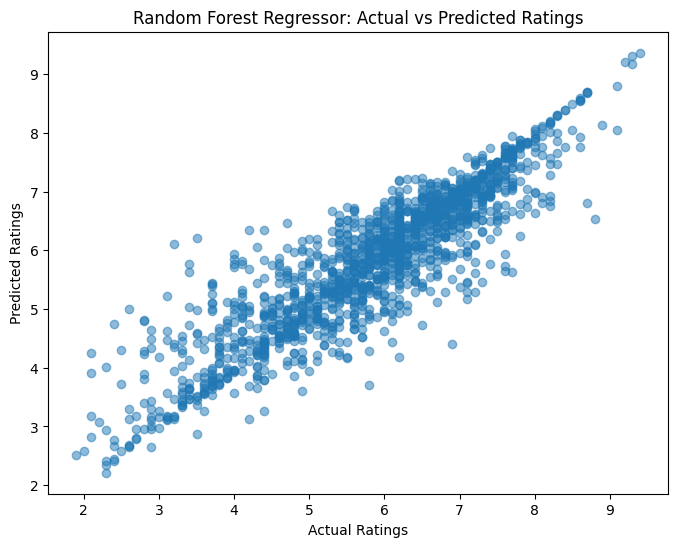

In [21]:
#Here we are ploting scatter plots comparing actual ratings with predicted ratings for both Linear Regression and Random Forest Regressor.
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()